In [1]:
# Certify the installation
# !pip show pandas numpy scikit-learn joblib

In [2]:
# if not installed, install pyCaret (Optional)
# !pip install pyCaret --use-pep517

In [3]:
# Certify the pyCaret installation
# !pip show pyCaret

### Test

Fitting 10 folds for each of 10 candidates, totalling 100 fits


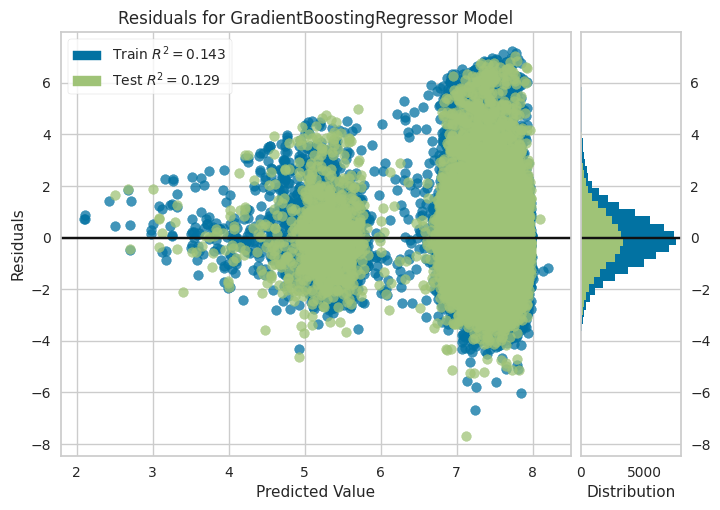

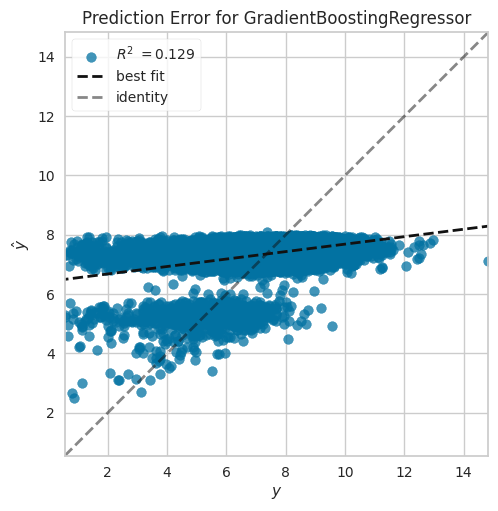

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'month', 'plurality',
                                              'mother_age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['state', 'mother_residence_state'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=...
                  TransformerWrapper(include=['state'],
                                     transformer=TargetEncoder(cols=['state'],
                                                               handle_missing='return_nan'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  GradientBoostingRegressor(learning_rate=0.05, max_

In [4]:
import pandas as pd
from pycaret.regression import *

# CSVファイルの読み込み
data = pd.read_csv('natality_2001_train_100k.csv')

# PyCaretのセットアップ
regression_setup = setup(
    data=data,
    target='weight_pounds',    # 目的変数の指定
    session_id=42,             # 再現性のための乱数シード
    normalize=True,            # データの正規化（オプション）
    verbose=False              # 詳細な出力を表示しないようにする
)

# モデルの比較 (RMSEを基準に選択)
best_model = compare_models(sort='RMSE')

# モデルのチューニング（RMSEを最小化する形でハイパーパラメータの最適化）
tuned_model = tune_model(best_model, optimize='RMSE')

# 最良モデルの結果を散布図として可視化
plot_model(tuned_model, plot='residuals')  # 残差プロット
plot_model(tuned_model, plot='error')      # 予測 vs 実測値プロット

# チューニング後の最良モデルを保存
save_model(tuned_model, 'best_model_weight_pounds')

### ZIP Action

In [5]:
import zipfile

with zipfile.ZipFile('regression_model_package.zip', 'w') as zf:
    zf.write('best_model_weight_pounds.pkl')
    zf.write('requirements.txt')
    zf.write('pred.py')